In [35]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

import torch

%matplotlib inline

In [36]:
# a = np.array(
#     [
#         [-3.38558779e-01, -3.74539485e00, 1.76955083e03],
#         [2.60367979e-01, -2.19804678e00, 8.70284220e02],
#         [7.89957650e-06, -3.79922875e-03, 1.00000000e00],
#     ]
# )

a = np.array(
    [
        [-3.18197280e-01, -3.05873793e00, 1.42293676e03],
        [2.12185144e-01, -1.83588790e00, 7.20665027e02],
        [-4.35247998e-05, -4.44636552e-03, 1.00000000e00],
    ]
)
# b = np.array(
#     [
#         [2.51956631e-01, -2.69914973e00, 9.41010908e02],
#         [1.77241499e-01, 1.28764441e-01, -6.03074371e02],
#         [-3.80590242e-05, -2.97089547e-03, 1.00000000e00],
#     ]
# )

b = np.array(
    [
        [7.76665778e-02, -1.36798585e00, 5.64848247e02],
        [6.66388825e-02, 1.69389517e-02, -2.25449838e02],
        [-9.73617871e-05, -2.36999031e-03, 1.00000000e00],
    ]
)

# c = np.array(
#     [
#         [1.34072071e-01, -6.15311830e-01, 6.20608069e01],
#         [-1.30492404e-01, -2.49742669e-01, 9.57946315e01],
#         [-9.02065028e-06, -1.89689644e-03, 1.00000000e00],
#     ]
# )


# c = np.array(
#     [
#         [-6.01886799e-01, -1.57507036e00, 2.52224775e03],
#         [8.01304905e-02, -1.27232646e00, 1.46510823e03],
#         [-6.74301123e-04, 1.85860015e-03, 1.00000000e00],
#     ]
# )

c = np.array(
    [
        [1.32579294e-01, -4.24335478e-01, -4.34272363e01],
        [-8.48398008e-02, -1.40574971e-01, 3.72730750e-01],
        [4.70467843e-05, -2.13970404e-03, 1.00000000e00],
    ]
)


In [37]:
IMG_A = "homo-images/src.jpg"
IMG_B = "homo-images/src1.jpg"
IMG_C = "homo-images/src2.jpg"
DST = "homo-images/dst.jpg"
SIZE = (1000, 1000)


In [38]:
src = cv2.imread(IMG_A)
src1 = cv2.imread(IMG_B)
src2 = cv2.imread(IMG_C)
dst = cv2.imread(DST)


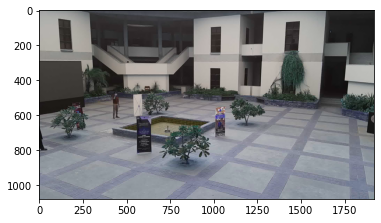

In [39]:
plt.imshow(src)


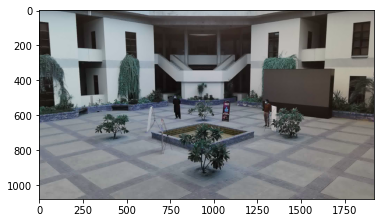

In [40]:
plt.imshow(src1)


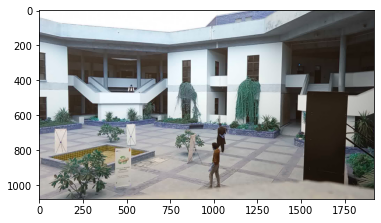

In [41]:
plt.imshow(src2)


In [42]:
SIZE = (int(dst.shape[1]), int(dst.shape[0]))
SIZE


(738, 409)

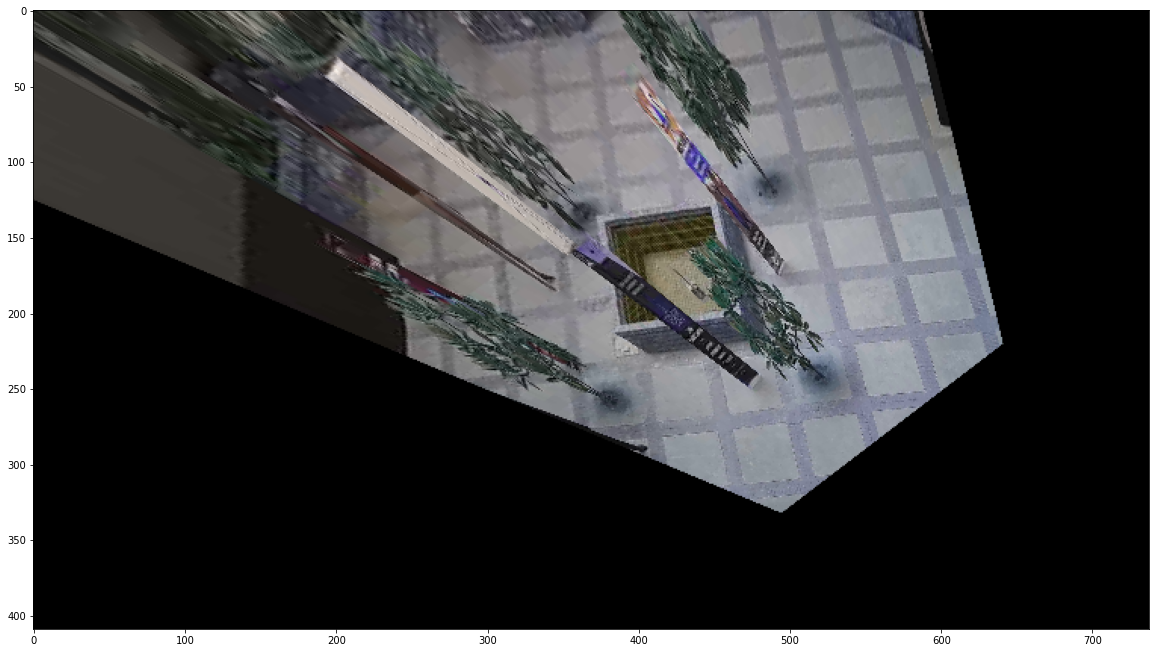

In [43]:
warped_img1 = cv2.warpPerspective(src, a, SIZE, cv2.INTER_LINEAR)
plt.figure(figsize=(20, 20))
plt.imshow(warped_img1)
plt.show()


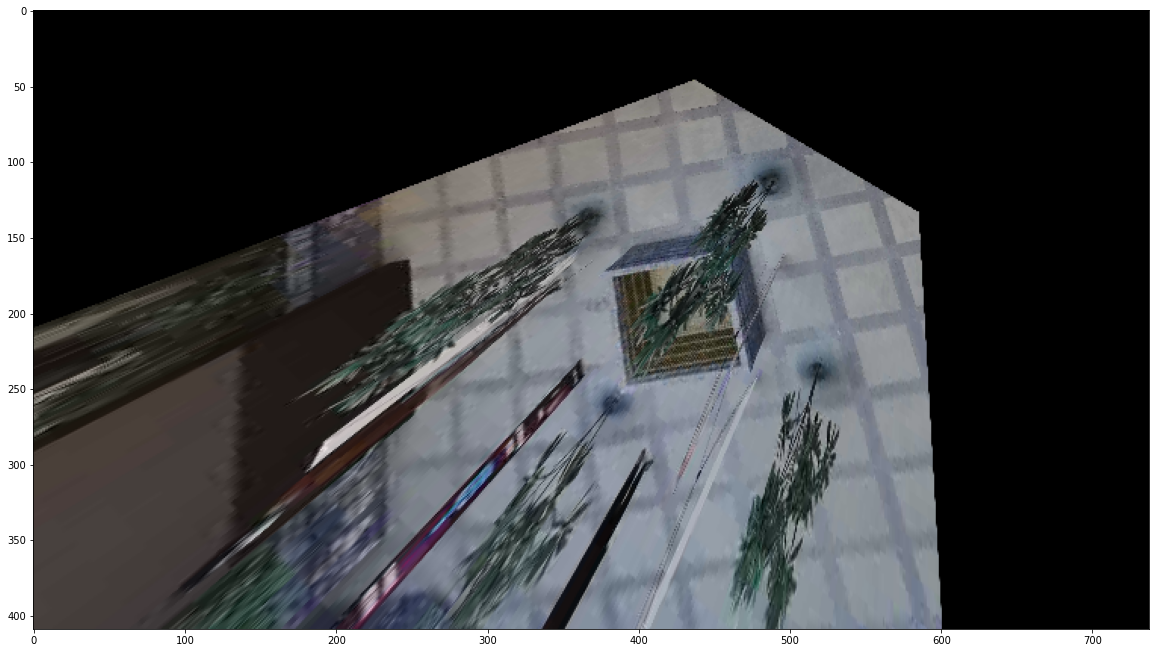

In [44]:
warped_img2 = cv2.warpPerspective(src1, b, SIZE, cv2.INTER_LINEAR)
plt.figure(figsize=(20, 20))
plt.imshow(warped_img2)
plt.show()


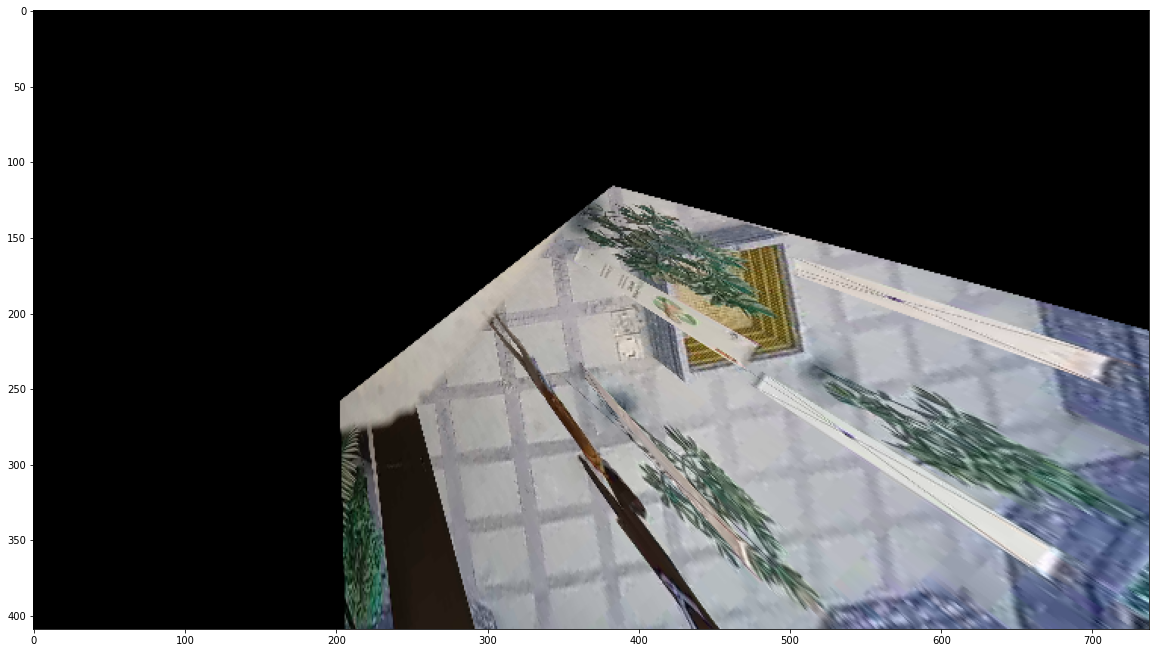

In [45]:
warped_img3 = cv2.warpPerspective(src2, c, SIZE, cv2.INTER_LINEAR)
plt.figure(figsize=(20, 20))
plt.imshow(warped_img3)
plt.show()


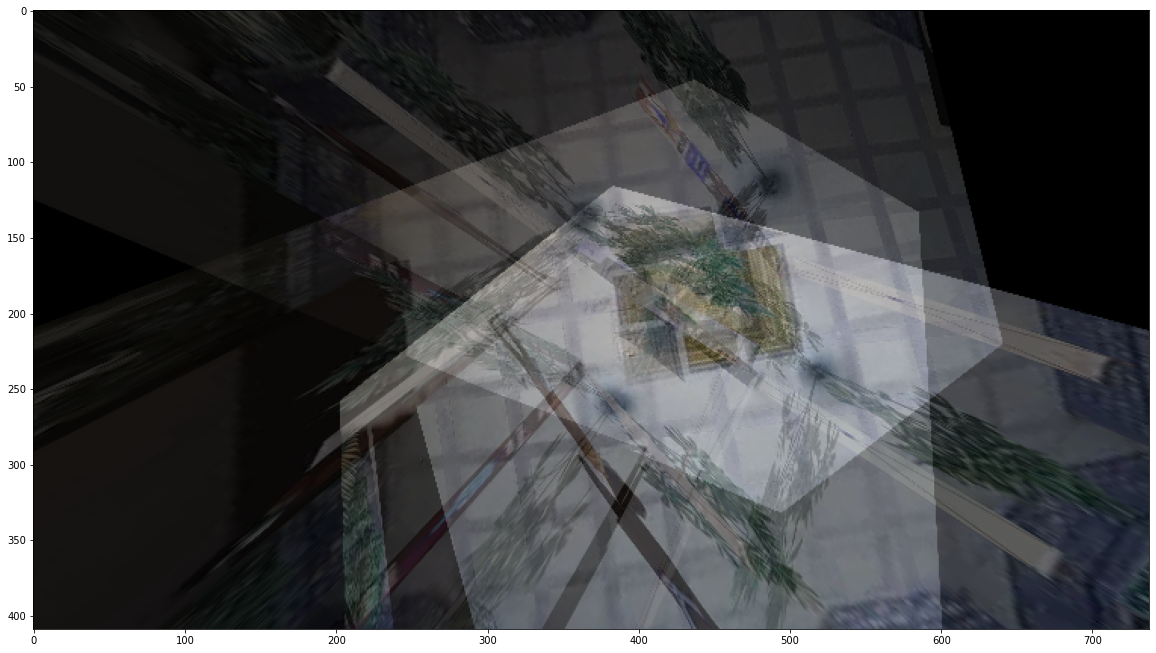

In [46]:

added = cv2.addWeighted(warped_img1, 0.5, warped_img2, 0.5, 0)
added2 = cv2.addWeighted(added, 0.6, warped_img3, 0.4, 0)
plt.figure(figsize=(20, 20))
plt.imshow(added2)
plt.show()


1


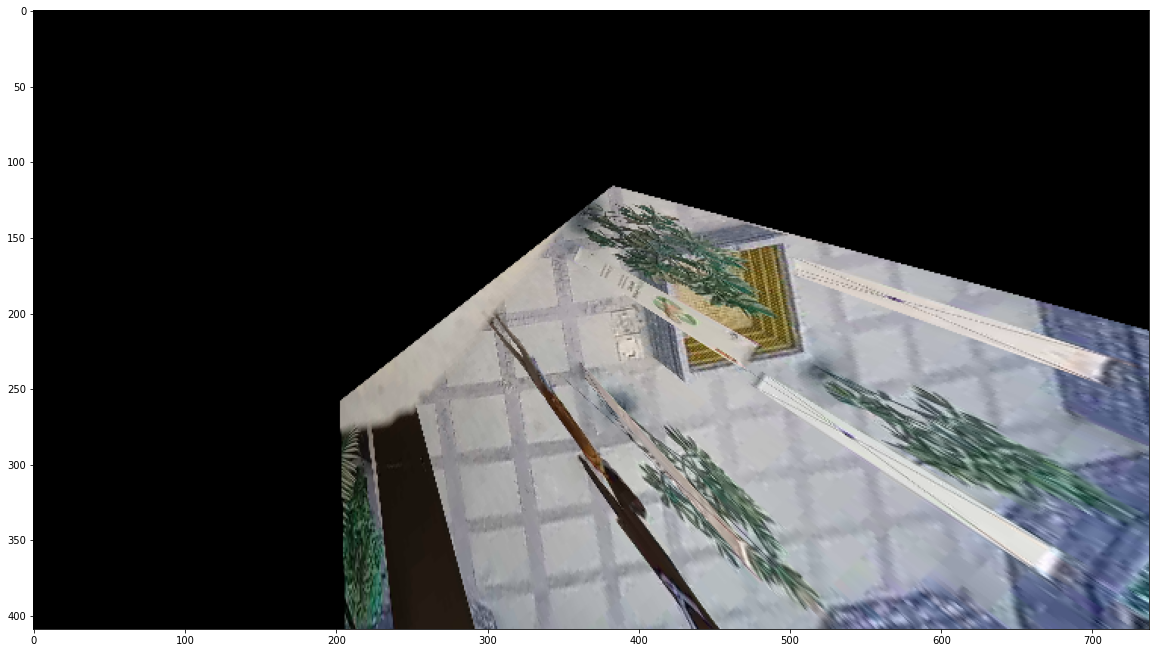

In [57]:
sticher = cv2.Stitcher_create()

status, img = sticher.stitch(warped_img2, warped_img1, warped_img3)

print(status)
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()

In [48]:
model = torch.hub.load(
    "ultralytics/yolov5",
    "custom",
    " best.pt",
    force_reload=True,
)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Mahd Iftkhar/.cache\torch\hub\master.zip
YOLOv5  2021-12-7 torch 1.8.0 CUDA:0 (GeForce GTX 1050, 3072MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


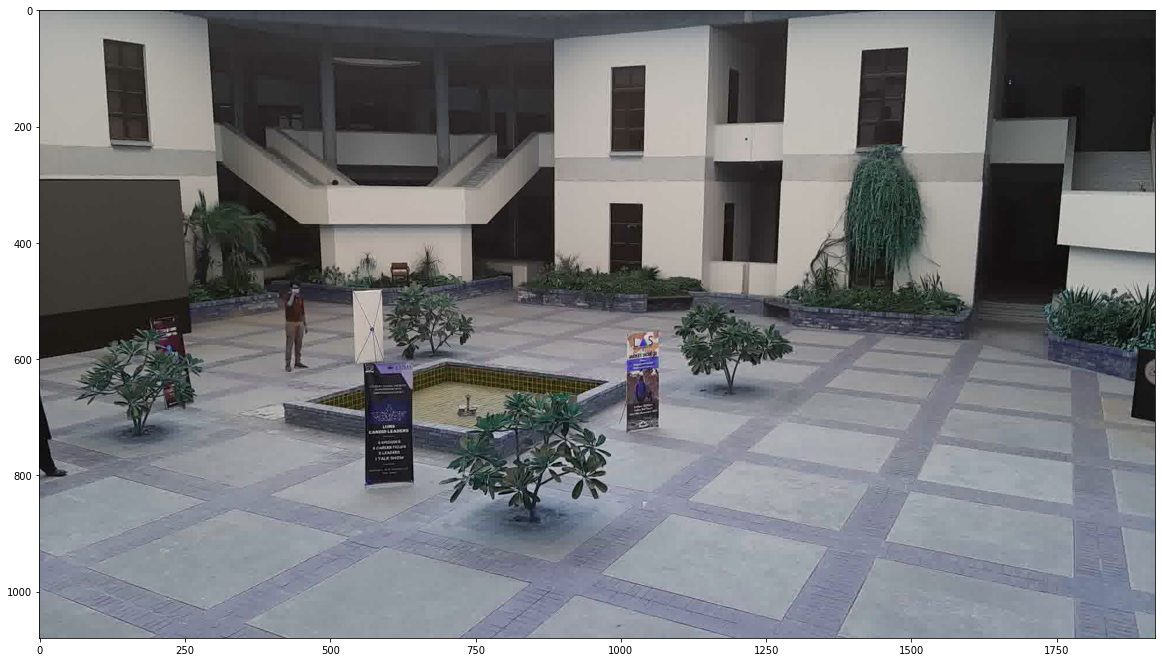

In [49]:
result = model(src)
# result.render()
frame1 = result.imgs[0]

plt.figure(figsize=(20, 20))
plt.imshow(frame1)
plt.show()


In [50]:
homogay = np.array(
    [
        [-1.23554027e-01, -3.85322224e00, 1.43825150e03],
        [2.24694038e-01, -2.26655077e00, 7.40911265e02],
        [2.79068272e-04, -5.28196793e-03, 1.00000000e00],
    ]
)

homogay2 = np.array(
    [
        [6.33597306e-02, -1.79967013e00, 6.34938030e02],
        [6.49471813e-02, 1.85487418e-01, -3.14975632e02],
        [-1.28869885e-04, -2.88646525e-03, 1.00000000e00],
    ]
)

homogay3 = np.array(
    [
        [4.98464634e-02, -4.31779385e-01, 9.91183543e01],
        [-4.99976284e-02, -1.70373928e-01, 5.75077114e01],
        [-9.15103086e-06, -2.03096591e-03, 1.00000000e00],
    ]
)


In [51]:
result1 = model(src)
labels, cord_thres = (
    result1.xyxyn[0][:, -1].cpu().numpy(),
    result1.xyxyn[0][:, :-1].cpu().numpy(),
)

print(list(labels), list(cord_thres))

[0.0] [array([    0.53594,      0.5066,     0.55547,     0.54479,     0.35449], dtype=float32)]


In [52]:
coords = cord_thres[0, :2]

coords *= np.array([1920, 1080])
coords = np.append(coords, [1])
new_coords = np.matmul(homogay, coords)
new_coords = (new_coords[:2] / new_coords[2]).astype(int)
new_coords

array([497, 167])

In [53]:
coords = None
coords = cord_thres[0, :2]
print(coords)
coords[0] *= 1920
coords[1] *= 1080

coords = [int(coords[0]), int(coords[1]), 1]
print(coords)


[       1029      547.12]
[1975680, 590895, 1]


In [54]:
box_coords = np.matmul(homogay, coords)
box_coords


array([-2.5195e+06, -8.9463e+05,     -2568.7])

In [55]:
final = [box_coords[0] // box_coords[2], box_coords[1] // box_coords[2]]
final


[980.0, 348.0]

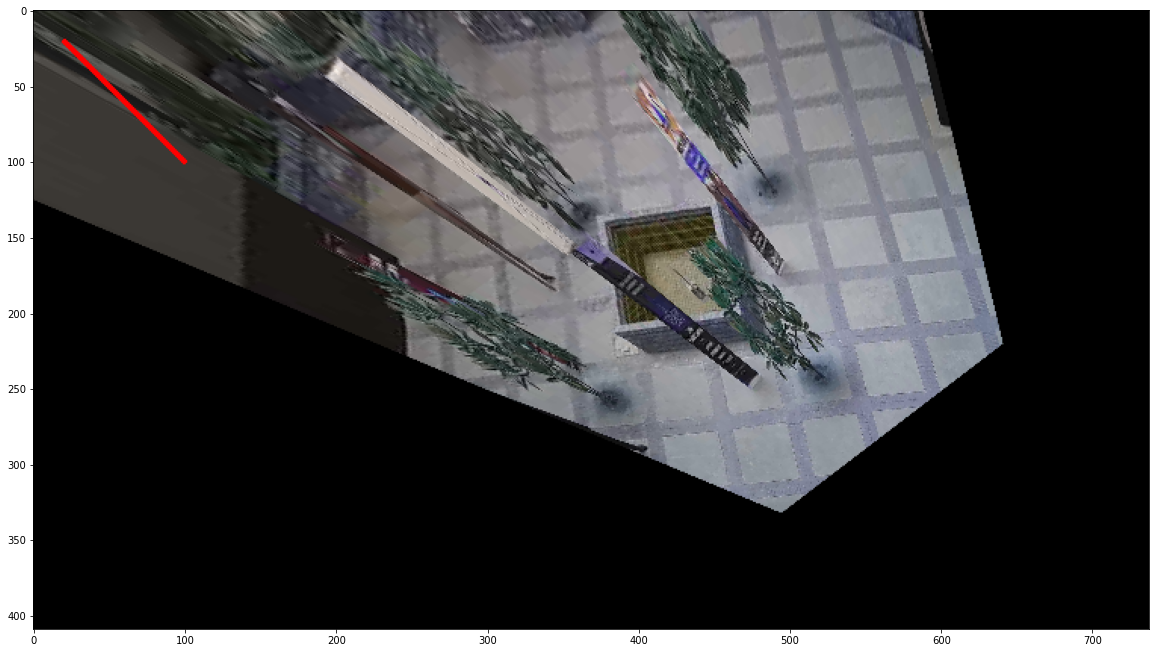

In [56]:
img = cv2.circle(warped_img1, (int(final[0]), int(final[1])), 5, (255, 0, 0), -1)

img = cv2.line(warped_img1, (20, 20), (100, 100), (255, 0, 0), 2)

plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()
